In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')

In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:

df = pd.get_dummies(df, columns=['day_of_week','store_and_fwd_flag'], drop_first=True)


Mean Squared Error: 34646029.56676634
R^2 Score: 0.00876881826858833
        Actual    Predicted
469114     657   889.978766
694852     195   861.049444
696324     840  1338.316656
356496     398   565.728766
645318     682   867.961187
...        ...          ...
219920     174   500.228766
537956    2096  2918.095099
258537     657   623.790411
200461    2011  1248.478766
503069     863   904.252203

[145865 rows x 2 columns]


Mean Squared Error: 146351.28926408716
R^2 Score: 0.17327152935069667
        Actual   Predicted
354792     460  624.099953
454169     344  497.623391
394276     786  827.443703
144493     220  506.318703
364301     303  519.599953
...        ...         ...
525332     312  503.787453
179556     420  541.700539
111955     568  529.412453
657045    1376  854.456276
121073      77  555.688942

[340464 rows x 2 columns]


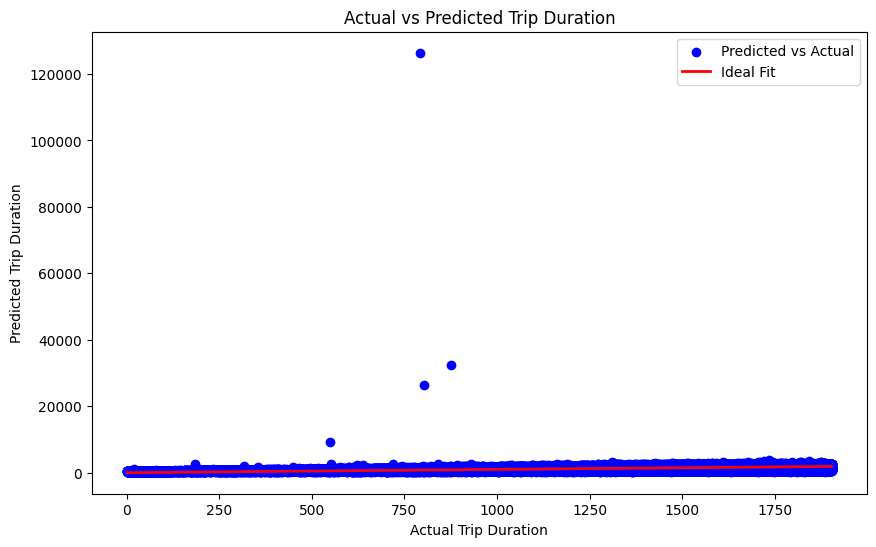

In [27]:



X = df[features]
y = df['trip_duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual vs Predicted Trip Duration')
plt.legend()
plt.show()

In [25]:
df.to_csv('saved.csv')

Shape of the dataframe after removing outliers: (609219, 25)


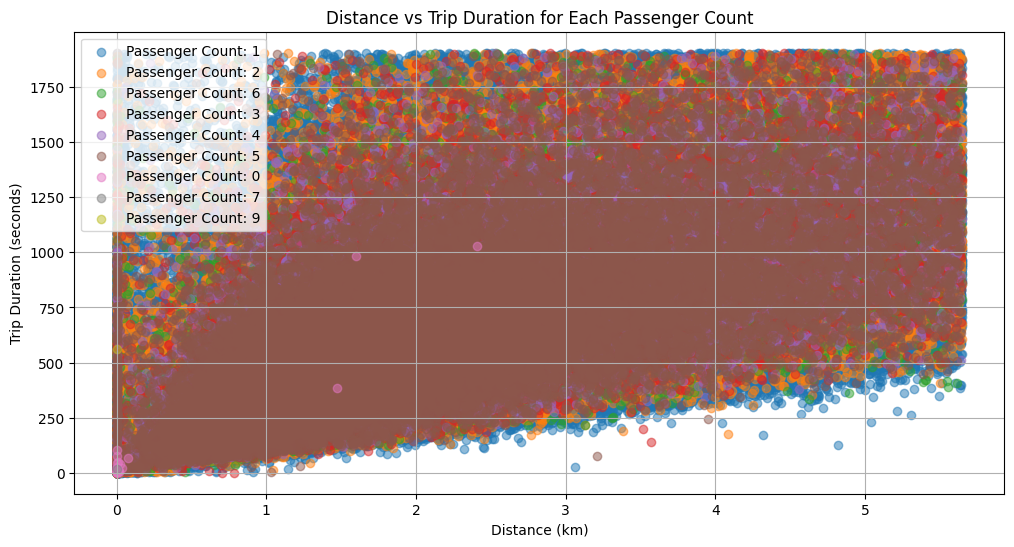

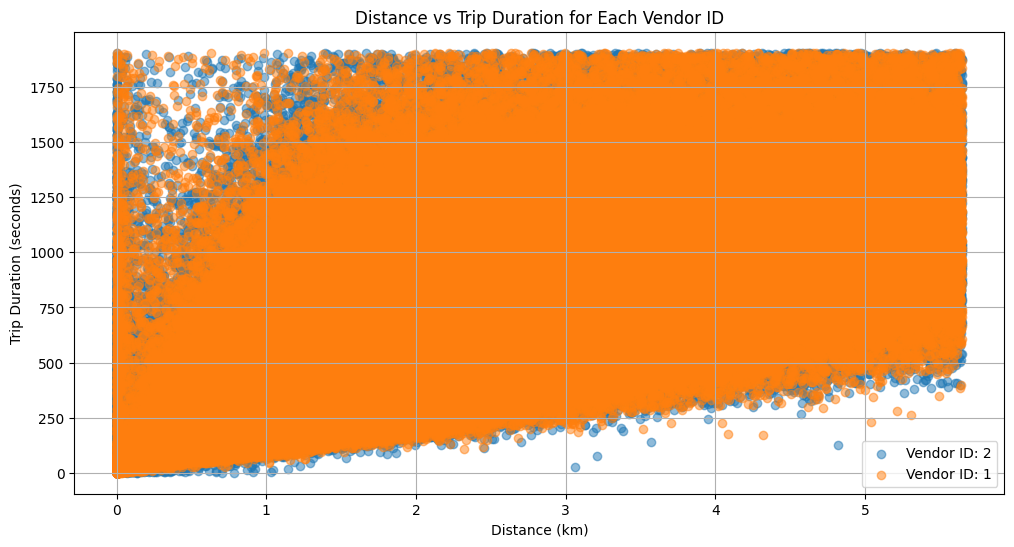

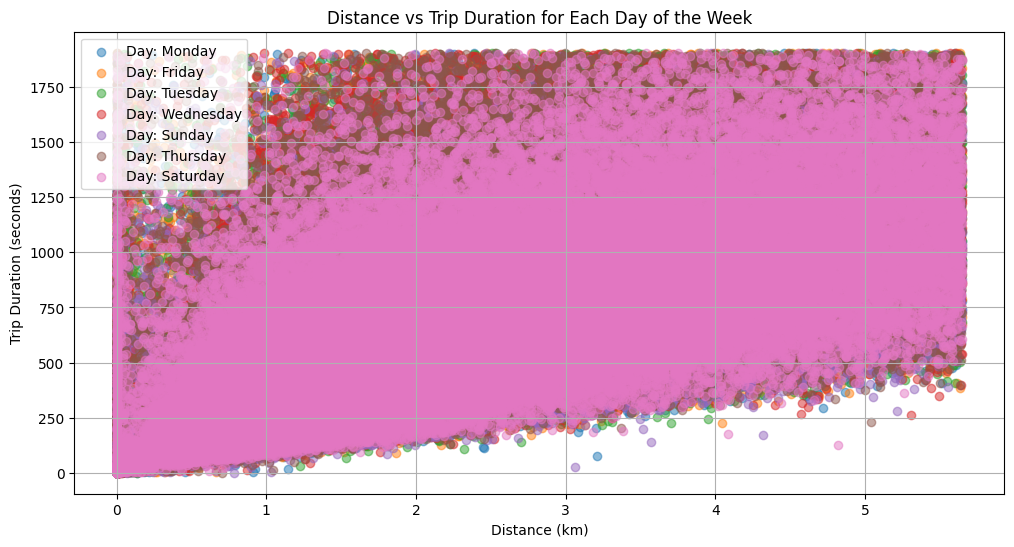

In [31]:
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).kilometers

df['distance_km'] = df.apply(calculate_distance, axis=1)

# Calculate day of the week
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Q1 = df['distance_km'].quantile(0.25)
Q3 = df['distance_km'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
df = df[(df['distance_km'] >= lower_bound) & (df['distance_km'] <= upper_bound)]

# Check the new shape of the dataframe
print(f"Shape of the dataframe after removing outliers: {df.shape}")


passenger_counts = df['passenger_count'].unique()
plt.figure(figsize=(12, 6))

for count in passenger_counts:
    plt.scatter(df[df['passenger_count'] == count]['distance_km'],
                df[df['passenger_count'] == count]['trip_duration'],
                alpha=0.5, label=f'Passenger Count: {count}')

plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Distance vs Trip Duration for Each Passenger Count')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot for each vendor ID: distance vs trip duration
vendor_ids = df['vendor_id'].unique()
plt.figure(figsize=(12, 6))

for vendor_id in vendor_ids:
    plt.scatter(df[df['vendor_id'] == vendor_id]['distance_km'],
                df[df['vendor_id'] == vendor_id]['trip_duration'],
                alpha=0.5, label=f'Vendor ID: {vendor_id}')

plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Distance vs Trip Duration for Each Vendor ID')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot for each day of the week: distance vs trip duration
days_of_week = df['day_of_week'].unique()
plt.figure(figsize=(12, 6))

for day in days_of_week:
    plt.scatter(df[df['day_of_week'] == day]['distance_km'],
                df[df['day_of_week'] == day]['trip_duration'],
                alpha=0.5, label=f'Day: {day}')

plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Distance vs Trip Duration for Each Day of the Week')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('nyc_taxi_trip_duration.csv')

def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).kilometers

df['distance_km'] = df.apply(calculate_distance, axis=1)


# Calculate speed in kilometers per second


##features = ['passenger_count', 'distance_km', 'passenger_count'] + [col for col in df.columns if col.startswith('store_and_fwd_flag')] + [col for col in df.columns if col.startswith('day_of_week')] + [col for col in df.columns if col.startswith('vendor_id')]

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['duration_sec'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()
df['speed_kmps'] = df['distance_km'] / df['duration_sec']

df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['day_of_week'] = df['day_of_week'].astype('category')

average_speed_by_day = df.groupby('day_of_week')['speed_kmps'].mean().reset_index()

# Display the average speed for each day of the week
print(average_speed_by_day)

df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df = pd.get_dummies(df, columns=['day_of_week','vendor_id','store_and_fwd_flag'], drop_first=False)



  day_of_week  speed_kmps
0      Friday    0.003816
1      Monday    0.004194
2    Saturday    0.004175
3      Sunday    0.004640
4    Thursday    0.003742
5     Tuesday    0.003807
6   Wednesday    0.003745


/var/folders/k0/mx_3vf5n6wdg8wkvxkg7znt00000gp/T/ipykernel_85033/1123353514.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_speed_by_day = df.groupby('day_of_week')['speed_kmps'].mean().reset_index()


/Users/sjayaraman/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.891e+10, tolerance: 4.662e+08
  model = cd_fast.enet_coordinate_descent(
/Users/sjayaraman/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.998e+10, tolerance: 4.740e+08
  model = cd_fast.enet_coordinate_descent(
/Users/sjayaraman/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

Best alpha: {'alpha': 1.0}
Best MSE: 9709599.792722601
Test MSE: 34646242.27830357
Test R-squared: 0.00876273254069826


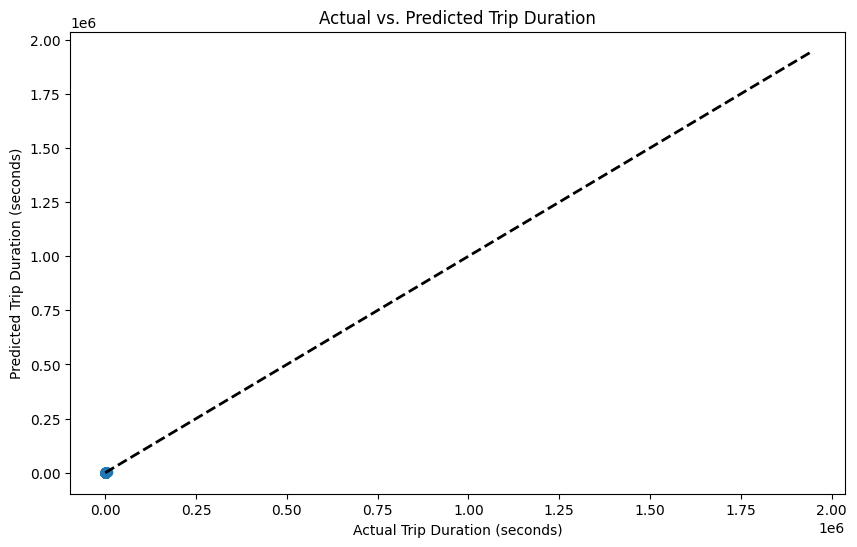

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV

features = ['distance_km'] + [col for col in df.columns if col.startswith('day_of_week_')] + [col for col in df.columns if col.startswith('vendor_id_')] + [col for col in df.columns if col.startswith('store_and_fwd_flag_')]
X = df[features]
y = df['duration_sec']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Lasso regression model
lasso = Lasso()

# Define parameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Print best alpha and best score
print("Best alpha:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# Predict on test set
y_pred = grid_search.predict(X_test_scaled)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R-squared:", r2)

# Plot actual vs. predicted trip durations
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:2000], y_pred[:2000], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Trip Duration (seconds)')
plt.ylabel('Predicted Trip Duration (seconds)')
plt.title('Actual vs. Predicted Trip Duration')
plt.show()


In [56]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [65]:
# Remove outliers in distance and duration using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'distance_km')
df = remove_outliers(df, 'duration_sec')


features = ['distance_km','passenger_count'] + [col for col in df.columns if col.startswith('day_of_week_')] + [col for col in df.columns if col.startswith('vendor_id_')] + [col for col in df.columns if col.startswith('store_and_fwd_flag_')]
X = df[features]
y = df['duration_sec']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Define the Lasso regression model
lasso = Lasso()

# Define parameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled)

# Print best alpha and best score
print("Best alpha:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# Predict on test set
y_pred_scaled = grid_search.predict(X_test_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R-squared:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test[:2000], scaler_y.inverse_transform(grid_search.predict(X_test_scaled).reshape(-1, 1))[:2000], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Trip Duration (seconds)')
plt.ylabel('Predicted Trip Duration (seconds)')
plt.title('Actual vs. Predicted Trip Duration')
plt.show()

Best alpha: {'alpha': 0.001}
Best MSE: 0.5450784088681739
Test MSE: 62908.449263132265
Test R-squared: 0.4555759347293078


NameError: name 'scaler_y' is not defined

<Figure size 1000x600 with 0 Axes>

Best alpha: {'alpha': 0.001}
Best MSE: 0.5184596614901723
Test MSE: 73047.10076644355
Test R-squared: 0.48440070128112367


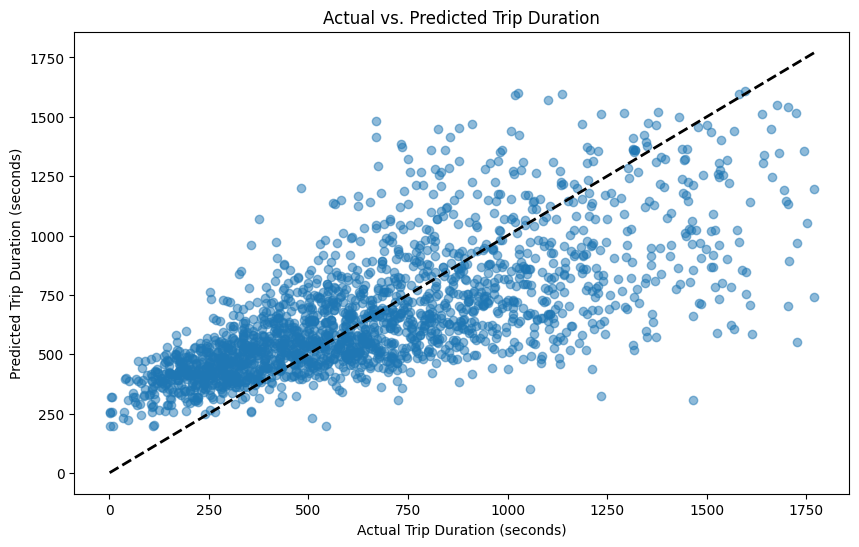

In [66]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('nyc_taxi_trip_duration.csv')

# Calculate distance in kilometers
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).kilometers

df['distance_km'] = df.apply(calculate_distance, axis=1)

# Convert datetime columns to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Calculate duration in seconds
df['duration_sec'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()

# Remove outliers in distance and duration using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'distance_km')
df = remove_outliers(df, 'duration_sec')

# Extract day of the week
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['day_of_week'] = df['day_of_week'].astype('category')

# Convert categorical columns to dummy variables
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df = pd.get_dummies(df, columns=['day_of_week', 'vendor_id', 'store_and_fwd_flag'], drop_first=False)

# Select features and target variable
features = ['distance_km'] + [col for col in df.columns if col.startswith('day_of_week_')] + [col for col in df.columns if col.startswith('vendor_id_')] + [col for col in df.columns if col.startswith('store_and_fwd_flag_')]
X = df[features]
y = df['duration_sec']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Normalize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Define the Lasso regression model
lasso = Lasso()

# Define parameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled)

# Print best alpha and best score
print("Best alpha:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# Normalize the entire dataset
X_scaled = scaler.transform(X)

# Predict on the entire dataset
y_pred_scaled = grid_search.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Add the predicted values to the original DataFrame
df['predicted_duration_sec'] = y_pred

# Save the updated DataFrame to a new CSV file
df.to_csv('nyc_taxi_trip_duration_with_predictions.csv', index=False)

# Calculate and print evaluation metrics for the test set
mse = mean_squared_error(y_test, scaler_y.inverse_transform(grid_search.predict(X_test_scaled).reshape(-1, 1)).flatten())
r2 = r2_score(y_test, scaler_y.inverse_transform(grid_search.predict(X_test_scaled).reshape(-1, 1)).flatten())
print("Test MSE:", mse)
print("Test R-squared:", r2)

# Plot actual vs. predicted trip durations for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:2000], scaler_y.inverse_transform(grid_search.predict(X_test_scaled).reshape(-1, 1))[:2000], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Trip Duration (seconds)')
plt.ylabel('Predicted Trip Duration (seconds)')
plt.title('Actual vs. Predicted Trip Duration')
plt.show()
